In [3]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt

np.set_printoptions(formatter={'float': '{: 0.5f}'.format}, suppress = True)
matplotlib.rcParams.update({'font.size': 16})

In [4]:
matplotlib.rcParams.update({'font.size': 16})

# Setup

In [15]:
# ==- PLOT PARAMETERS -=============================================================================
loglogalpha = 0.70
baralpha    = 0.85

plot_size = (14,8)
subplot_size = (7,4)

# ==- COLORS -======================================================================================
#            normal     dark       light
c_red     = ["#e6194b", "#800000", "#fabebe"]
c_orange  = ["#f58231", "#9a6324", "#ffd8b1"]
c_yellow  = ["#ffe119", "#808000", "#fffac8"]
c_lime    = ["#bfef45"]
c_green   = ["#3cb44b",            "#aaffc3"]
c_cyan    = ["#42d4f4", "#469990"]
c_blue    = ["#4363d8", "#000075"]
c_purple  = ["#911eb4",            "#e6beff"]
c_magenta = ["#f032e6"]
c_gray    = ["#a9a9a9", "#000000", "#ffffff"]
accessibility_95    = [c_red[0],     c_green[0],   c_blue[0],    c_yellow[0],  c_orange[0],
                       c_purple[0],  c_cyan[0],    c_magenta[0], c_lime[0],    c_red[2],
                       c_cyan[1],    c_purple[1],  c_orange[1],  c_yellow[2],  c_red[1],
                       c_green[1],   c_yellow[1],  c_orange[2],  c_blue[1],    c_gray[0],
                       c_gray[1]]
accessibility_99    = [c_red[0],     c_green[0],   c_blue[0],    c_yellow[0],  c_orange[0],
                       c_cyan[0],    c_magenta[0], c_red[2],     c_cyan[1],    c_purple[1],  
                       c_orange[1],  c_yellow[2],  c_red[1],     c_green[1],   c_blue[1],    
                       c_gray[0],    c_gray[1]]
accessibility_99_99 = [c_blue[0],    c_yellow[0],  c_orange[0],  c_red[2],     c_purple[1],  
                       c_red[1],     c_blue[1],    c_gray[0],    c_gray[1]]
accessibility_100   = [c_blue[0],    c_yellow[0],  c_gray[0],    c_gray[1]]

# File Reading

In [16]:
# Read a file containing one array
def read_file(filename, timeframe="ns"):
    arr = []
    f = open(filename, "r")

    for line in f:
        meas = float(line.replace("\n", ""))
        if timeframe == "ns": 
            arr.append(meas/1000000)
        if timeframe == "ms":
            arr.append(meas)
    
    return np.array(arr)

# Plots

In [17]:
def loglogplot(x, y, xlabel, ylabel):
    fig, ax = plt.subplots()
    fig.set_size_inches(plot_size)
    
    ax.loglog(x, y, '.', alpha=loglogalpha, color=colors[3])

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    
    plt.show()

def violinplot(x, yscale="log"): # TODO: Maybe check out how to remove the outliers or try seaborn
    fig, ax = plt.subplots()
    
    fig.set_size_inches(plot_size)
    plt.yscale(yscale)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    
    ax.violinplot(x)

# Determinant of the Covariance Matrix Computation Time 

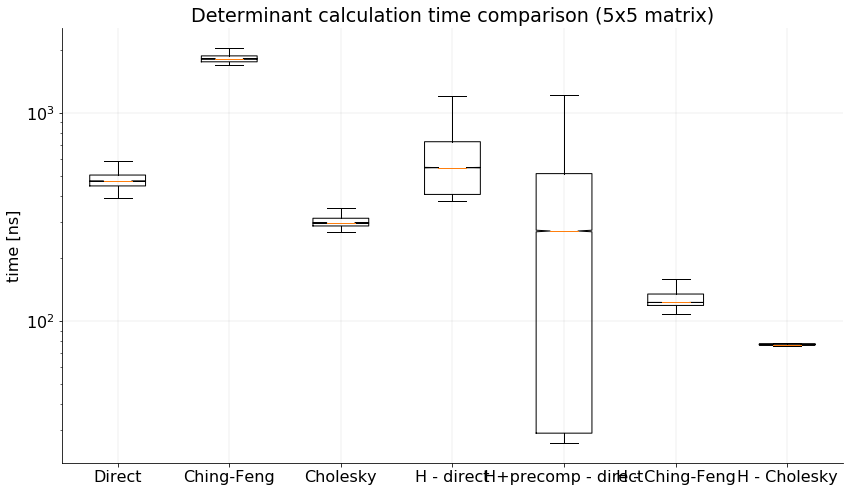

In [18]:
def boxplot(x, labels, ylabel, title, showfliers=True, yscale="log"):
    fig, ax = plt.subplots()

    plt.ylabel(ylabel)
    plt.title(title)
    
    fig.set_size_inches(plot_size)
    plt.yscale(yscale)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
    
    ax.boxplot(x, labels=labels, notch=True, showfliers=showfliers)

file_names = ["m001", "m002", "m003", "m004", "m005", "m006", "m007", "m008", "m009", "m010", 
              "m020", "m030", "m040", "m050", "m060", "m070", "m080", "m090", "m100"]
labels = ["n=1",  "n=2",  "n=3",  "n=4",  "n=5",  "n=6",  "n=7",  "n=8",  "n=9", "n=10", 
          "n=20", "n=30", "n=40", "n=50", "n=60", "n=70", "n=80", "n=90", "n=100"]

org_arr = []
for file_name in ["org_det_ss-10e5/" + s + ".txt" for s in file_names]:
    org_arr.append(read_file(file_name))

cho_arr = []
for file_name in ["cho_det_ss-10e5/" + s + ".txt" for s in file_names]:
    cho_arr.append(read_file(file_name))

f_arr = []
for file_name in ["f_det_ss-10e5/" + s + ".txt" for s in file_names]:
    f_arr.append(read_file(file_name))

h_arr = []
h_arr.append(read_file("hardcoded_ss-10e5/noprecalc.txt"))
h_arr.append(read_file("hardcoded_ss-10e5/precalc.txt"))
h_arr.append(read_file("hardcoded_ss-10e5/chingfeng.txt"))
h_arr.append(read_file("hardcoded_ss-10e5/cholesky.txt"))

ylabel = "time [ns]"

# title = "Determinant calculation of a nxn matrix through direct calculation"
# boxplot(org_arr,      labels,      ylabel, title, showfliers=True,  yscale="log")
# boxplot(org_arr[:10], labels[:10], ylabel, title, showfliers=False, yscale="log")
# boxplot(org_arr[9:],  labels[9:],  ylabel, title, showfliers=False, yscale="log")

# title = "Determinant calculation of a nxn matrix through the Cholesky decomposition"
# boxplot(cho_arr,      labels,      ylabel, title, showfliers=True,  yscale="log")
# boxplot(cho_arr[:10], labels[:10], ylabel, title, showfliers=False, yscale="log")
# boxplot(cho_arr[9:],  labels[9:],  ylabel, title, showfliers=False, yscale="log")

# title = "Determinant calculation of a nxn matrix through the Ching-Feng formula"
# boxplot(f_arr,      labels,      ylabel, title, showfliers=True,  yscale="log")
# boxplot(f_arr[:10], labels[:10], ylabel, title, showfliers=False, yscale="log")
# boxplot(f_arr[9:],  labels[9:],  ylabel, title, showfliers=False, yscale="log")

title = "Determinant calculation time comparison (5x5 matrix)"
names = ["Direct", "Ching-Feng", "Cholesky", "H - direct", "H+precomp - direct", "H - Ching-Feng"]
names.append("H - Cholesky")
arrs  = [org_arr[4]*10e5, f_arr[4]*10e5, cho_arr[4]*10e5, h_arr[0]*10e5, h_arr[1]*10e5, h_arr[2]*10e5]
arrs.append(h_arr[3]*10e5)
boxplot(arrs, names, ylabel, title, showfliers=False, yscale="log")

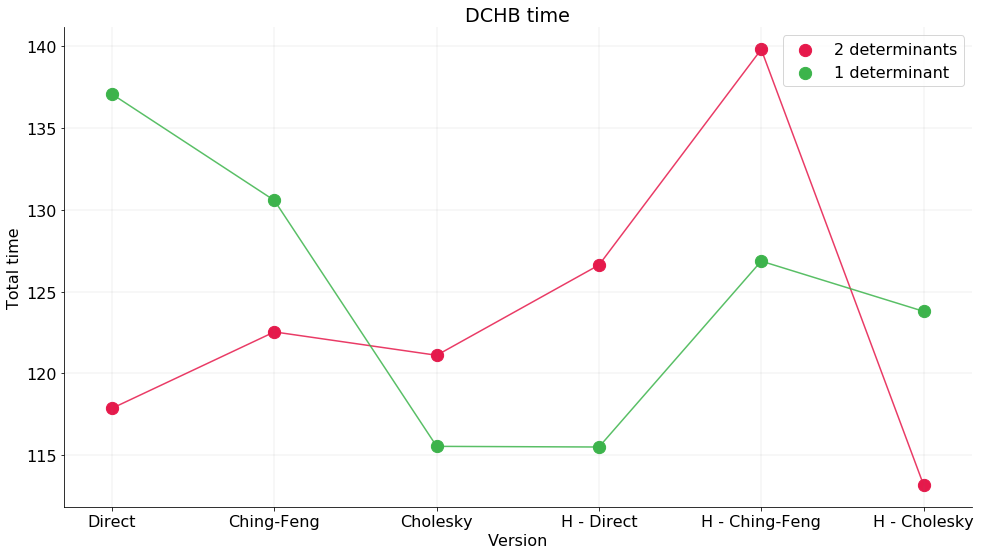

In [19]:
names      = ["Direct", "Ching-Feng", "Cholesky", "H - Direct", "H - Ching-Feng", "H - Cholesky"]
times_2det = np.array([117.87, 122.54, 121.11, 126.63, 139.82, 113.19])
times_1det = np.array([137.08, 130.58, 115.54, 115.50, 126.87, 123.80])

fig, ax = plt.subplots()

fig.set_size_inches(plot_size)
index = np.arange(len(names))

scatter2 = plt.scatter(index, times_2det, s=150, c=accessibility_99[0], label="2 determinants")
plot2    = plt.plot(   index, times_2det, c=accessibility_99[0], alpha=baralpha)
scatter1 = plt.scatter(index, times_1det, s=150, c=accessibility_99[1], label="1 determinant")
plot1    = plt.plot(   index, times_1det, c=accessibility_99[1], alpha=baralpha)

plt.xlabel("Version")
plt.ylabel("Total time")
plt.title("DCHB time")
plt.xticks(index, names)
plt.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

plt.tight_layout()
plt.show()

# Engine Times

Version:
* v1.0: Original JLab version
* v1.1: Refactored and micro-optimized
* v1.2: Sherman-Morrison formula implementated
* v1.3: Cholesky decomposition implemented
* v1.4.1: Multithreaded track finding
* v1.4.2: Multithreaded cluster finding
* v1.5: Current status

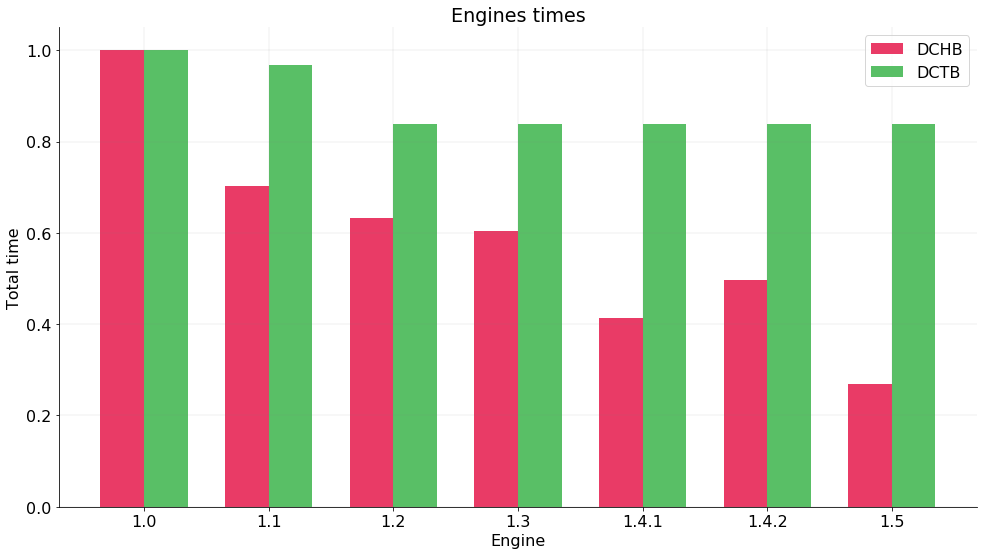

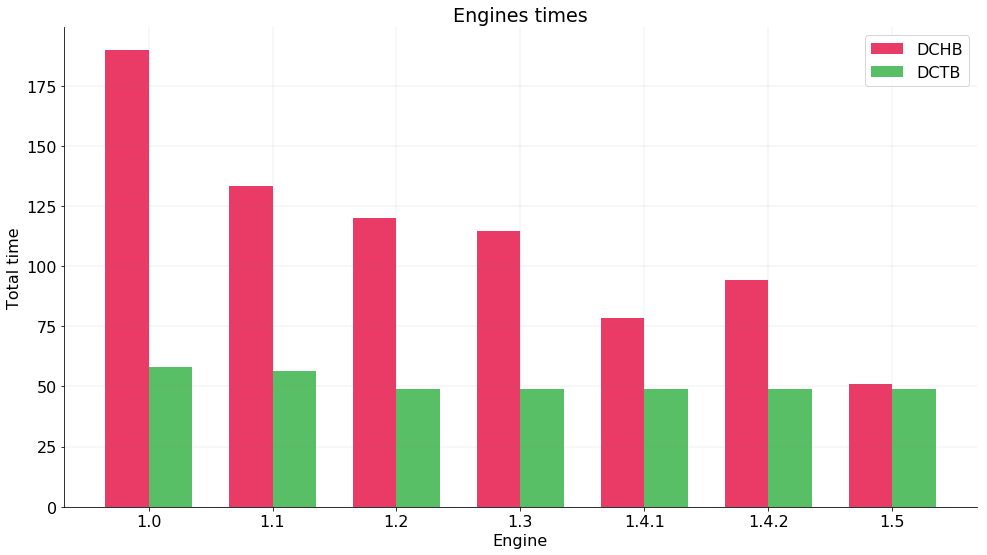

In [20]:
def hbtbplot(hb_t, tb_t, names):
    fig, ax = plt.subplots()
    
    fig.set_size_inches(plot_size)
    index = np.arange(len(names))
    bar_width = 0.35

    rectsHB = plt.bar(index, hb_t, bar_width, alpha=baralpha, color=accessibility_99[0], label="DCHB")
    rectsTB = plt.bar(index + bar_width, tb_t, bar_width, alpha=baralpha, color=accessibility_99[1], label="DCTB")

    plt.xlabel("Engine")
    plt.ylabel("Total time")
    plt.title("Engines times")
    plt.xticks(index + bar_width/2, names)
    plt.legend()

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

    plt.tight_layout()
    plt.show()

versions = ["1.0", "1.1", "1.2", "1.3", "1.4.1", "1.4.2", "1.5"]
hb_t     = np.array([189.75, 133.52, 120.02, 114.80, 78.66, 94.27, 51.18]) # UPDATE
tb_t     = np.array([ 58.18,  56.24,  48.78,  48.78, 48.78, 48.78, 48.78]) # UPDATE

# TODO: Start with this plot in my thesis when comparing versions
hbtbplot(hb_t/hb_t[0], tb_t/tb_t[0], versions)
hbtbplot(hb_t, tb_t, versions)

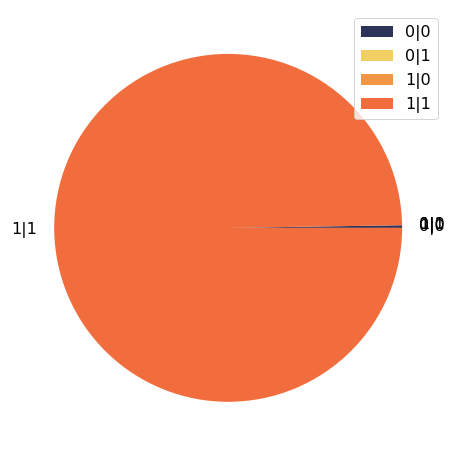

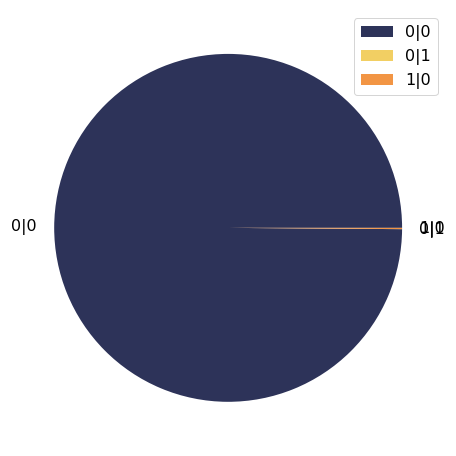

In [12]:
x = [51479, 2, 59, 21607688]
l = ["0|0", "0|1", "1|0", "1|1"]
c = [contrast_colors[0], contrast_colors[1], contrast_colors[2], contrast_colors[3]]

fig, ax = plt.subplots()
fig.set_size_inches(plot_size)
plt.pie(x, labels=l, colors=c)
plt.legend()
plt.show()

fig, ax = plt.subplots()
fig.set_size_inches(plot_size)
plt.pie(x[0:3], labels=l[0:3], colors=c[0:3])
plt.legend()
plt.show()